In [1]:
from datascience import *
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##
A. Looking at Functions and Grouping 

The apply function 
- We want to use that for the whole array of values as a column in a table 
- take a table and create a new array; this would be the function applied to ebvery row of our table 

## Function to Predict

In [4]:
insurance = Table.read_table('../Datasets/insurance_charges.csv')
insurance
# Gives 1300 ish people and data on them and the charge of the bill for the stay at the hospital 

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


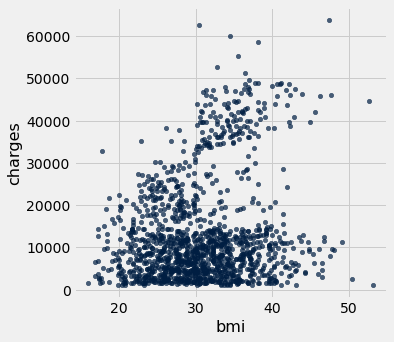

In [5]:
insurance.scatter('bmi', 'charges')
# Using bmi to see what their charages may be 
# Hard to see if there's a trend or not
# There's a background variable, wheater people are a smoker or not 
# So we need to group by smoker

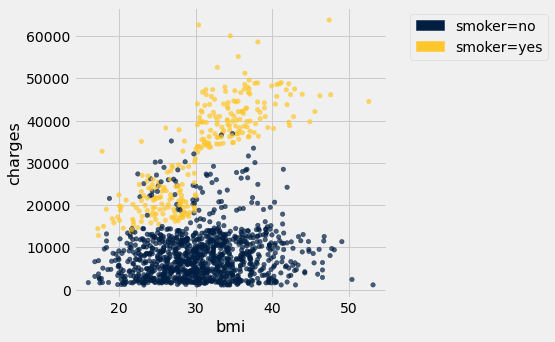

In [6]:
insurance.scatter('bmi', 'charges', group = 'smoker')
# Same plot, but IDs who is a smoker vs a not smoker 

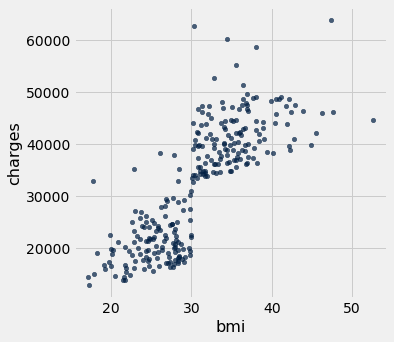

In [7]:
insurance_smoker = insurance.where('smoker', 'yes')
insurance_smoker.scatter('bmi', 'charges')
# Shows the scatter plot of only the smoker charges
# Here we can see more a trend 
# Theres almost a split 
# Right at 30, theres a split 
# We dont know if it's a hospital policy of charaging a certain BMI 

### For a patient with a BMI of 35, how much will the charges be?
- How can we make predictions 
- reproduce the plot 
- and draw a line on the plot 
- with reference lines 
- get a rough idea of where something is in relation to the map 
- someone who has a bmi of 35, draw a vertical line

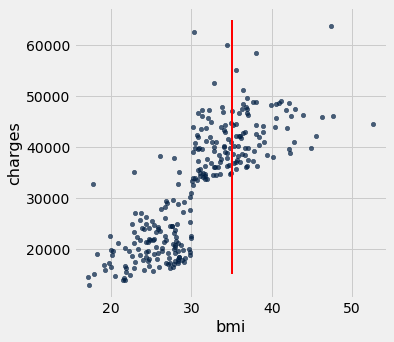

In [8]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([35, 35], [15000, 65000], color='red', lw=2);
# This draws the line on the graph where the bmi is 35
# Plots = plt = matplotlib
# [35,35] = tells wehre the line should start and end, X ways; and then the y domain
# [x,x], [y,y] = the domain we want included 

# We color it red with the color = "red"
# and lw=2 will make the line a certain thickness 

In [9]:
insurance_smoker.where('bmi', are.equal_to(35))

age,sex,bmi,children,smoker,region,charges


### Can we use all BMIs *close* to 35? 

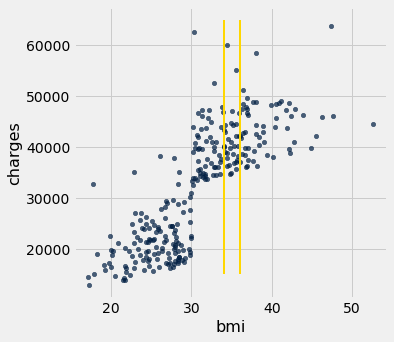

In [11]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([34, 34], [15000, 65000], color='gold', lw=2);
plots.plot([36, 36], [15000, 65000], color='gold', lw=2);

In [12]:
nearby = insurance_smoker.where('bmi', are.between(34, 36))
nearby_mean = np.mean(nearby.column('charges'))
nearby_mean

41303.62382125

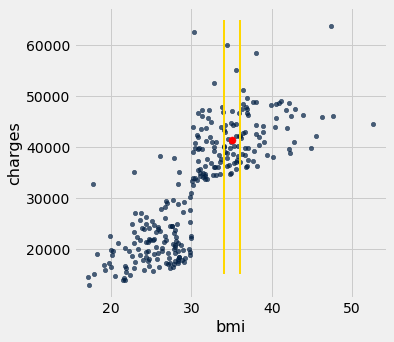

In [13]:
insurance_smoker.scatter('bmi', 'charges')
plots.plot([34, 34], [15000, 65000], color='gold', lw=2);
plots.plot([36, 36], [15000, 65000], color='gold', lw=2);
plots.scatter(35, nearby_mean, color='red', s=50);

### Can we write a function to do this for all BMIs in the data? 

In [15]:
def predict(bmi):
    nearby = insurance_smoker.where('bmi', are.between(bmi -1 , bmi + 1))
    return np.mean(nearby.column('charges'))

In [16]:
predict(35)

41303.62382125

In [17]:
predict(23)

21921.67706777778

In [18]:
predict(27)

22854.848840666662

In [19]:
predicted_charges = insurance_smoker.apply(predict, 'bmi')
predicted_charges

array([21938.98684917, 22670.53803731, 44621.29085   , 41143.17644759,
       39364.1627731 , 42329.12499219, 41634.38642333, 42586.35475833,
       42516.8842976 , 43434.4769    , 41228.65593375, 21832.19430595,
       41094.48070429, 42743.02066833, 39349.87613806, 22172.17900118,
       19470.89362895, 21248.3506288 , 21049.63755074, 43054.20305182,
       41494.05093063, 22172.17900118, 39238.54970853, 31190.65710967,
       39742.72837065, 18253.79788   , 18421.50333333, 32400.54788194,
       21832.19430595, 41207.67643176, 21879.00598027, 39810.73989031,
       22114.16369784, 18809.82498   , 21828.71142207, 22230.09195219,
       35513.04538686, 21986.070331  , 21219.13462111, 21615.139505  ,
       41634.38642333, 22452.9474568 , 42897.2641776 , 43470.35314947,
       44755.80916111, 42420.58602429, 22111.72613868, 41494.05093063,
       21259.31190414, 19443.45736944, 23177.98754733, 42516.8842976 ,
       22111.72613868, 18756.466225  , 39582.95151741, 41008.71965786,
      

In [22]:
insurance_smoker = insurance_smoker.with_column(
    'Predicted charges', predicted_charges)

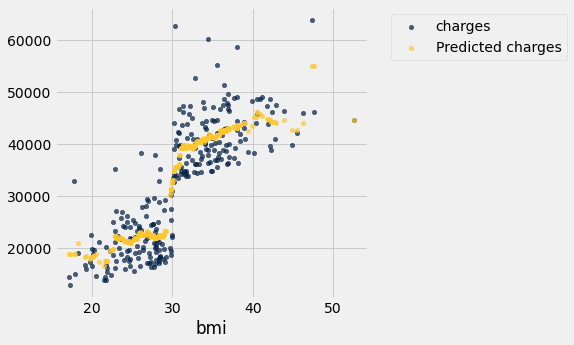

In [21]:
insurance_smoker.select(
    'charges', 
    'bmi', 
    'Predicted charges'
).scatter('bmi')

## Grouping by One Column ##

In [23]:
cereal = Table.read_table('../Datasets/Cereal.csv')
cereal

Name,Company,Serving,Calories,Fat,Sodium,Carbs,Fiber,Sugars,Protein
Boo Berry,General Mills,1,118,0.8,211,27,0.1,14,1
Crunchy Bran,Quaker,0.75,120,1.3,309,31,6.4,8,1.3
King Vitaman,Quaker,1.5,80,0.7,173,17,0.9,4,1.3
Crispix,Kellogs,1,113,0.3,229,26,0.1,3,2
Cocoa Blasts,Quaker,1,130,1.2,135,29,0.8,16,1
Cinnamon Toast Crunch,General Mills,0.75,169,4.4,408,32,1.7,13.3,2.7
Corn Pops,Kellogs,1,117,0.2,120,28,0.3,15,1
Kix,General Mills,1.3,87,0.5,205,20,0.8,2.3,1.5
Special K,Kellogs,1,117,0.4,224,22,0.8,4,7
Rice Krispie Treats,Kellogs,0.75,160,1.7,252,35,0,12,1.3


In [24]:
cereal.group('Company')

Company,count
General Mills,3
Kellogs,4
Quaker,3


In [25]:
cereal.select('Company', 'Calories').group('Company', np.average)

Company,Calories average
General Mills,124.667
Kellogs,126.75
Quaker,110


In [ ]:
cereal.drop('Serving', 'Name').group('Company', np.average)

In [ ]:
cereal.drop('Serving').group('Company', np.average)

In [ ]:
cereal.select('Company', 'Fat').group('Company', max)

## Grouping By One Column ##

In [28]:
sleep = Table.read_table('../Datasets/SleepStudy.csv').select(
    'ClassYear',
    'LarkOwl',
    'GPA', 
    'PoorSleepQuality', 
    'AverageSleep', 
    'Drinks'
)

sleep

ClassYear,LarkOwl,GPA,PoorSleepQuality,AverageSleep,Drinks
4,Neither,3.6,4,7.18,10
4,Neither,3.24,6,6.93,6
4,Owl,2.97,18,5.02,3
1,Lark,3.76,9,6.9,2
4,Owl,3.2,9,6.35,4
4,Neither,3.5,6,9.04,0
2,Lark,3.35,2,7.52,6
2,Lark,3,10,9.01,3
1,Neither,4,5,8.54,3
4,Neither,2.9,2,6.68,6


In [29]:
sleep.group('ClassYear')

ClassYear,count
1,47
2,95
3,54
4,57


In [30]:
sleep.group('ClassYear', np.average)

ClassYear,LarkOwl average,GPA average,PoorSleepQuality average,AverageSleep average,Drinks average
1,,3.52787,6.51064,7.92532,4.48936
2,,3.12758,6.04211,8.03368,6.10526
3,,3.21389,6.5,7.89889,5.48148
4,,3.23158,6.17544,7.95,5.64912


In [31]:
by_Drinks = sleep.group('Drinks', np.average)
by_Drinks.show()

Drinks,ClassYear average,LarkOwl average,GPA average,PoorSleepQuality average,AverageSleep average
0,2.12121,,3.31606,6.06061,7.90485
1,2.55556,,3.42778,6.77778,7.77778
2,2.3125,,3.3975,5.5,7.99313
3,2.66667,,3.35167,6.86667,8.17267
4,2.61111,,3.33833,6.77778,8.01611
5,2.48387,,3.15613,6.48387,7.8029
6,2.78261,,3.27826,5.34783,7.75
7,2.59091,,3.17818,5.90909,8.53227
8,2.5,,3.37286,6.64286,7.92929
9,2.09091,,3.30545,6.72727,7.89091


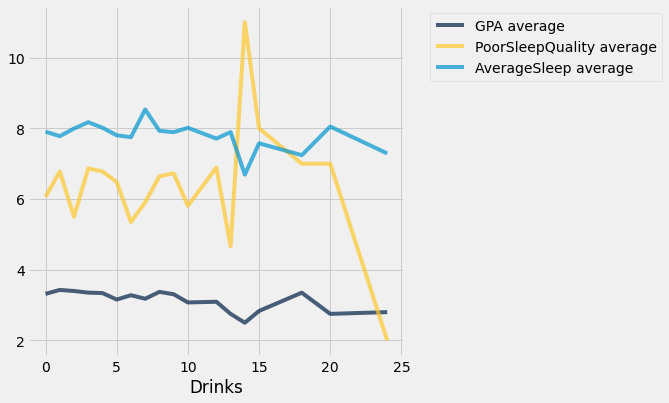

In [32]:
# Drop the 'ClassYear average' and LarkOwl average' columns

by_Drinks.drop(1,2).plot('Drinks')

## Grouping by Two Columns ##

In [33]:
sleep.group(['ClassYear','LarkOwl']).show()

ClassYear,LarkOwl,count
1,Lark,6
1,Neither,33
1,Owl,8
2,Lark,18
2,Neither,54
2,Owl,23
3,Lark,9
3,Neither,35
3,Owl,10
4,Lark,8


In [34]:
sleep.group(['ClassYear','LarkOwl'], np.average).show()

ClassYear,LarkOwl,GPA average,PoorSleepQuality average,AverageSleep average,Drinks average
1,Lark,3.31333,8.16667,7.92333,3
1,Neither,3.5403,6.36364,7.9703,4.15152
1,Owl,3.6375,5.875,7.74125,7
2,Lark,3.33833,5.72222,8.03389,5.72222
2,Neither,3.0987,5.44444,7.97685,6.05556
2,Owl,3.03043,7.69565,8.16696,6.52174
3,Lark,3.29778,5.55556,7.59556,4.88889
3,Neither,3.204,6.31429,7.992,5.57143
3,Owl,3.173,8,7.846,5.7
4,Lark,3.365,4,8.16625,2.875


## Pivot Tables

In [35]:
sleep.pivot('ClassYear', 'LarkOwl')

LarkOwl,1,2,3,4
Lark,6,18,9,8
Neither,33,54,35,41
Owl,8,23,10,8


In [36]:
sleep.pivot('ClassYear', 'LarkOwl', values='Drinks', collect=np.average)

LarkOwl,1,2,3,4
Lark,3,5.72222,4.88889,2.875
Neither,4.15152,6.05556,5.57143,6.07317
Owl,7,6.52174,5.7,6.25
